# CM09 - decision trees - voorbeeld 1 en oefening 1

In dit notebook is data verzameld over woningen in New York en San Francisco. Is op basis van de kenmerken van een woning te bepalen of deze in New York of San Francisco ligt?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Classificeer de huizen in onderstaande data set met een decision tree. In de kolom `in_sf` staat een 1 als het huis in San Fransisco staat en een 0 als het huis in New York staat.

In [2]:
homes = pd.read_csv('decision_trees_homes_ny_sf.csv', sep=",")
print(f"{len(homes)} meetwaarden, waarvan {homes.in_sf.sum()} in San Fransisco")
homes.head()

492 meetwaarden, waarvan 268 in San Fransisco


,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


## Voorbeeld
Een voorbeeld van een simpele beslisboom wordt hieronder gegeven.

1. Kies het modeltype

In [3]:
model = DecisionTreeClassifier()

2. Kies de features en targetvariabele

In [4]:
feat_names = ['beds', 'bath']
cat_names = ['San Francisco', 'New York']
feats = np.array(homes[feat_names])
cat = homes['in_sf']

3. Maak een train- en testset

In [5]:
feats_train, feats_test, cat_train, cat_test = train_test_split(feats, cat, random_state=10)
print("{} elementen in de trainset en {} elementen in de testset".format(len(cat_train), len(feats_test)))

369 elementen in de trainset en 123 elementen in de testset


4. Train het model

In [6]:
model.fit(feats_train, cat_train)

DecisionTreeClassifier()

5. Evalueer de resultaten

In [7]:
# M.b.v. de score wordt de accuracy berekend: het percentage voorspellingen dat correct
model.score(feats_test, cat_test)

0.7723577235772358

In [8]:
# Alternatieve manier om de voorspellende waarde te berekenen is door het model de klasse te voorspellen voor
# de testset van de features en deze te vergelijken met de testset van de klassen.
cat_model = model.predict(feats_test)
accuracy_score(cat_test, cat_model)

0.7723577235772358

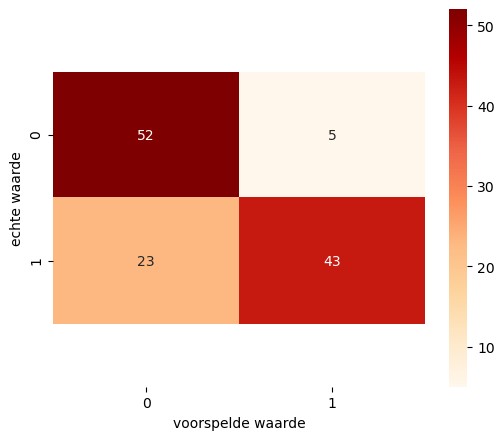

In [9]:
# Het is ook interessant om te kijken welke voorspellingen goed gaan en welke niet gaan. 
# Je ziet dat vooral de NY-huizen niet goed voorspeld worden. Dus het is zaak om onderscheidende features toe te voegen.

import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(cat_test, cat_model)

# Maak van de array een pandas dataframe om te visualiseren
df_cm = pd.DataFrame(cm)

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax = sns.heatmap(df_cm, annot=True, cmap='OrRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('voorspelde waarde')
ax.set_ylabel('echte waarde')

plt.show()

Visualisatie van de decision tree met GraphViz.

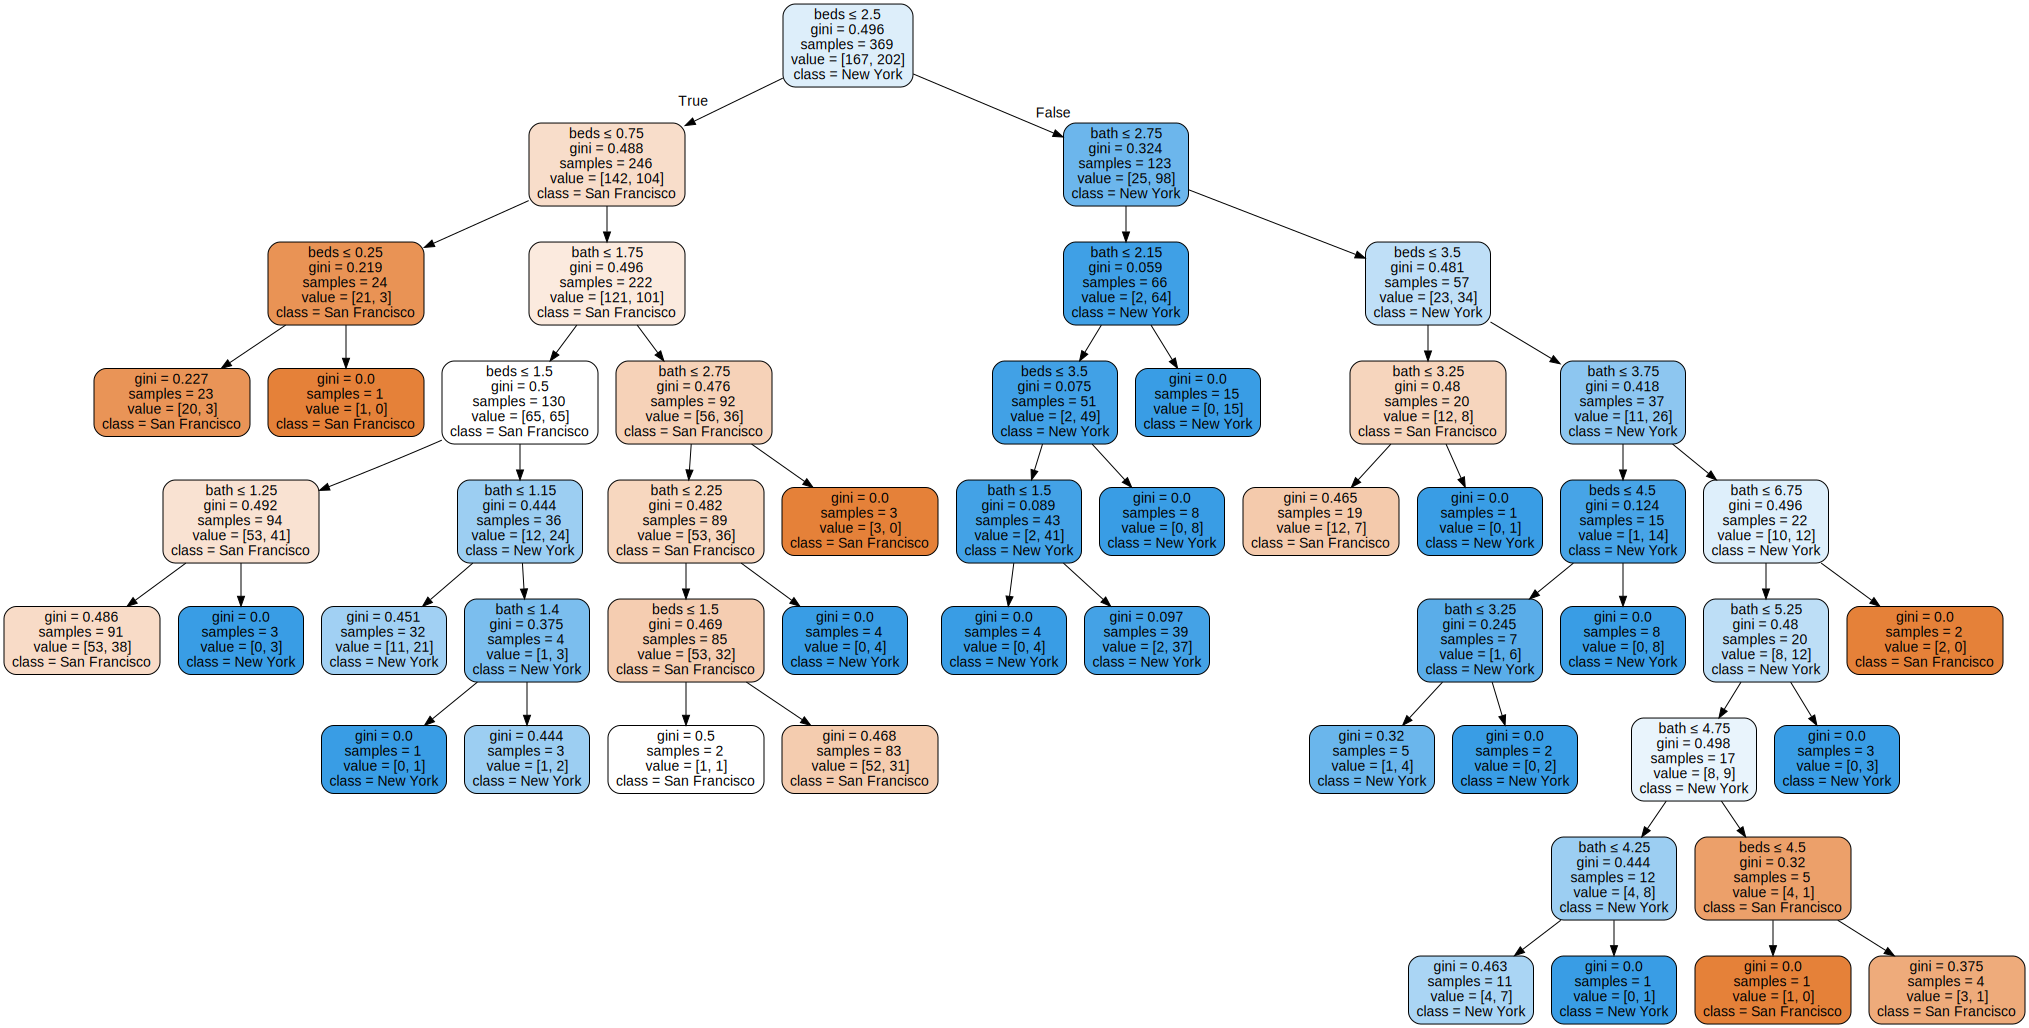

In [10]:
data = export_graphviz(model, out_file=None, feature_names=feat_names, class_names=cat_names,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

## Opdracht
Het is de bedoeling dat jullie zelf een betere beslisboom gaan maken. Het is dus de bedoeling om een hogere accuracy te krijgen! 

Denk aan het toevoegen van features, aanpassen van hyperparameters, etc.

Selecteer de _features_ en de target _classes_.

In [11]:
feat_names = homes.columns[1:]
cat_names = ['San Francisco', 'New York']
feats = np.array(homes[feat_names])
cat = homes['in_sf']

Opdelen in een train- en een testset.

In [12]:
feats_train, feats_test, cat_train, cat_test = train_test_split(feats, cat, random_state=10)
print("{} elementen in de trainset en {} elementen in de testset".format(len(cat_train), len(feats_test)))

369 elementen in de trainset en 123 elementen in de testset


Maak een _decision tree_ model, train deze en bereken de voorspellende waarde.

In [20]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(feats_train, cat_train)
model.score(feats_test, cat_test)

0.9186991869918699

In [14]:
# Alternatieve manier om de voorspellende waarde te berekenen is door het model de klasse te voorspellen voor
# de testset van de features en deze te vergelijken met de testset van de klassen.
cat_model = model.predict(feats_test)
accuracy_score(cat_test, cat_model)

0.9186991869918699

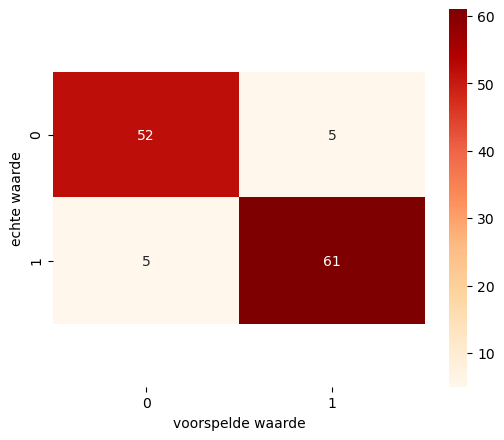

In [15]:
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(cat_test, cat_model)

# Maak van de array een pandas dataframe om te visualiseren
df_cm = pd.DataFrame(cm)

fig, ax = plt.subplots(figsize=(6, 5), dpi=100)

ax = sns.heatmap(df_cm, annot=True, cmap='OrRd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

ax.set_xlabel('voorspelde waarde')
ax.set_ylabel('echte waarde')

plt.show()

Visualisatie van de decision tree met GraphViz.

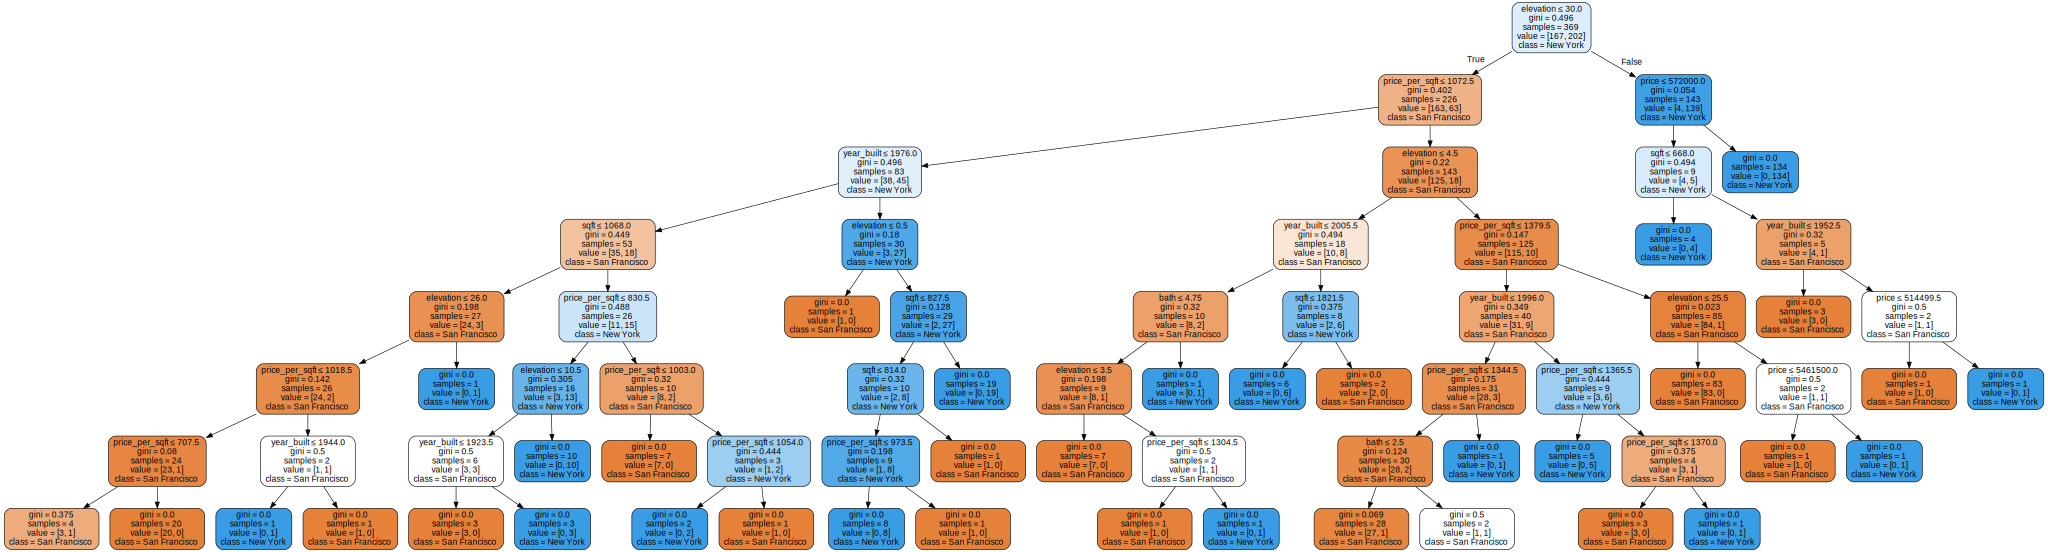

In [16]:
data = export_graphviz(model, out_file=None, feature_names=feat_names, class_names=cat_names,   
                         filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(data)
graph

Bepaal de invloed van het aantal lagen van de boom op de voorspellingsscore.

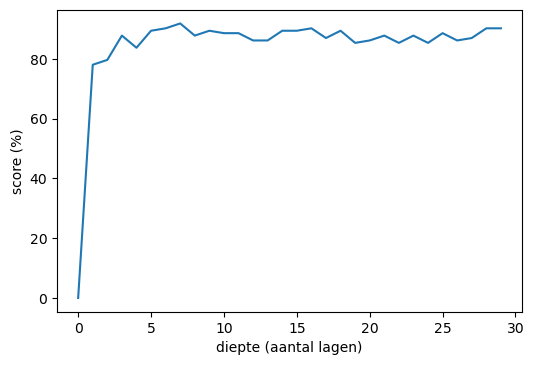

In [17]:
max_depth = 30
scores = np.zeros(max_depth)
depths = range(max_depth)
for depth in depths[1:]:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(feats_train, cat_train)
    score = model.score(feats_test, cat_test)
    scores[depth] = score
#     print("Score bij diepte {}: {:.2f}%.".format(depth, score))

fig, ax = plt.subplots(1, dpi=100)
ax.plot(depths, scores*100)

ax.set_xlabel("diepte (aantal lagen)")
ax.set_ylabel("score (%)")

plt.show()